In [105]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from run import run_experiment_ellipsoids, run_experiment_meshes

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [106]:
dists, res = run_experiment_ellipsoids(n_pairs=1000)

Running benchmark on 1000 pairs of Ellipsoids...
Dist: -0.1m | GJK Avg: 6.52 | Nest Avg: 9.51
Dist: -0.01m | GJK Avg: 9.84 | Nest Avg: 9.39
Dist: -0.001m | GJK Avg: 13.28 | Nest Avg: 10.72
Dist: -0.0005m | GJK Avg: 13.53 | Nest Avg: 11.90
Dist: 0.0005m | GJK Avg: 14.09 | Nest Avg: 12.82
Dist: 0.001m | GJK Avg: 14.34 | Nest Avg: 13.16
Dist: 0.01m | GJK Avg: 16.59 | Nest Avg: 12.18
Dist: 0.1m | GJK Avg: 18.13 | Nest Avg: 11.68
Dist: 1.0m | GJK Avg: 12.72 | Nest Avg: 12.21


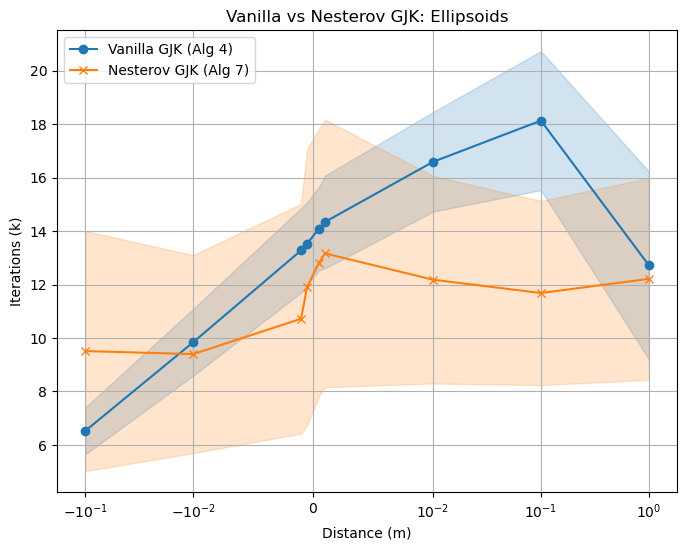

In [111]:
# Plotting (Replicating Fig 5a [cite: 546])
plt.figure(figsize=(8, 6))

plt.fill_between(
    dists, 
    res["mean_iters_gjk"] - res["std_iters_gjk"], # Lower bound
    res["mean_iters_gjk"] + res["std_iters_gjk"], # Upper bound
    alpha=0.2,       # Transparency (0 is invisible, 1 is solid)
    color="tab:blue" # Match the line color
)
plt.plot(dists, res["mean_iters_gjk"], marker="o", label="Vanilla GJK (Alg 4)")

plt.fill_between(
    dists, 
    res["mean_iters_nesterov"] - res["std_iters_nesterov"], # Lower bound
    res["mean_iters_nesterov"] + res["std_iters_nesterov"], # Upper bound
    alpha=0.2,       # Transparency (0 is invisible, 1 is solid)
    color="tab:orange" # Match the line color
)
plt.plot(
    dists, res["mean_iters_nesterov"], marker="x", label="Nesterov GJK (Alg 7)"
)
plt.xscale("symlog", linthresh=0.01)  # Log scale x-axis as used in paper figures
plt.xlabel("Distance (m)")
plt.ylabel("Iterations (k)")
plt.title("Vanilla vs Nesterov GJK: Ellipsoids")
plt.grid(True, which="both", ls="-")
plt.legend()

plt.show()


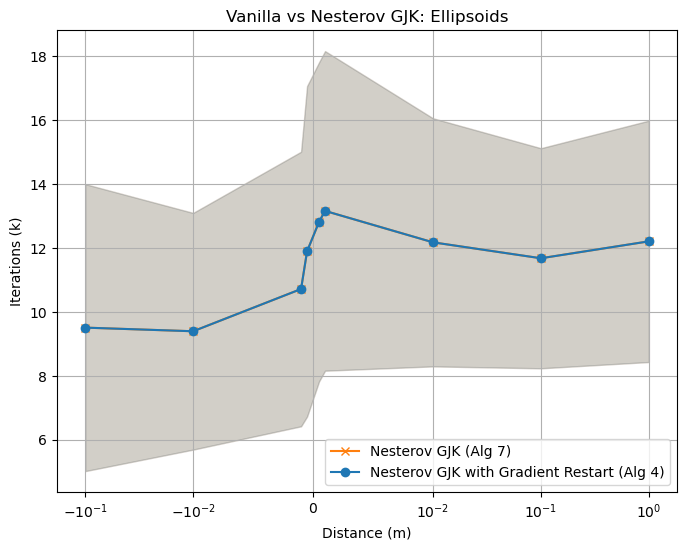

In [108]:
# Plotting (Replicating Fig 5a [cite: 546])
plt.figure(figsize=(8, 6))


plt.fill_between(
    dists, 
    res["mean_iters_nesterov"] - res["std_iters_nesterov"], # Lower bound
    res["mean_iters_nesterov"] + res["std_iters_nesterov"], # Upper bound
    alpha=0.2,       # Transparency (0 is invisible, 1 is solid)
    color="tab:orange" # Match the line color
)
plt.plot(
    dists, res["mean_iters_nesterov"], marker="x", label="Nesterov GJK (Alg 7)", color="tab:orange"
)

plt.fill_between(
    dists, 
    res["mean_iters_nesterov_restart"] - res["std_iters_nesterov_restart"], # Lower bound
    res["mean_iters_nesterov_restart"] + res["std_iters_nesterov_restart"], # Upper bound
    alpha=0.2,       # Transparency (0 is invisible, 1 is solid)
    color="tab:blue" # Match the line color
)
plt.plot(dists, res["mean_iters_nesterov_restart"], marker="o", label="Nesterov GJK with Gradient Restart (Alg 4)", color="tab:blue")


plt.xscale("symlog", linthresh=0.01)  # Log scale x-axis as used in paper figures
plt.xlabel("Distance (m)")
plt.ylabel("Iterations (k)")
plt.title("Vanilla vs Nesterov GJK: Ellipsoids")
plt.grid(True, which="both", ls="-")
plt.legend()

plt.show()


In [109]:
dists_non_convex, res_non_convex = run_experiment_meshes(n_pairs=1000)

Running benchmark on 1000 pairs of Polytopes (N=100)...
Dist: -0.1m | GJK: 4.3 | Nest: 4.1 | Nest+Norm: 4.0
Dist: -0.01m | GJK: 5.2 | Nest: 4.3 | Nest+Norm: 4.3
Dist: 0.0m | GJK: 3.8 | Nest: 2.3 | Nest+Norm: 2.6
Dist: 0.001m | GJK: 4.5 | Nest: 4.0 | Nest+Norm: 3.4
Dist: 0.01m | GJK: 4.4 | Nest: 3.9 | Nest+Norm: 3.3
Dist: 0.1m | GJK: 3.9 | Nest: 3.7 | Nest+Norm: 3.4
Dist: 1.0m | GJK: 2.6 | Nest: 3.3 | Nest+Norm: 2.3


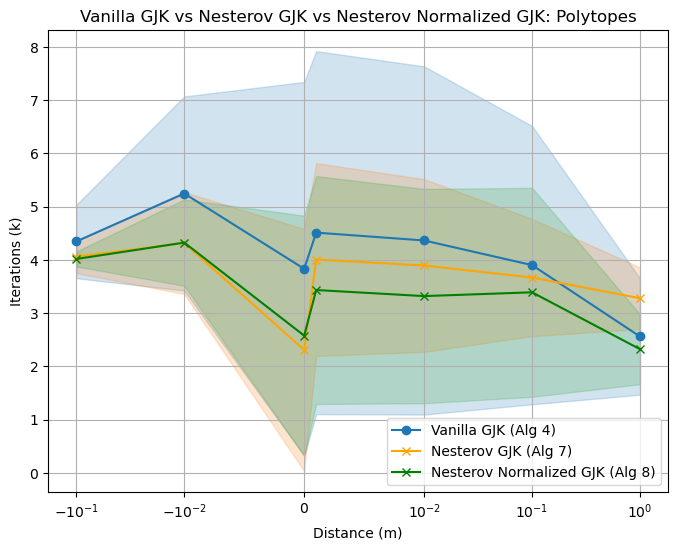

In [113]:
# Plotting (Replicating Fig 5a [cite: 546])
plt.figure(figsize=(8, 6))

plt.fill_between(
    dists_non_convex, 
    res_non_convex["mean_iters_gjk"] - res_non_convex["std_iters_gjk"], # Lower bound
    res_non_convex["mean_iters_gjk"] + res_non_convex["std_iters_gjk"], # Upper bound
    alpha=0.2,       # Transparency (0 is invisible, 1 is solid)
    color="tab:blue" # Match the line color
)
plt.plot(dists_non_convex, res_non_convex["mean_iters_gjk"], marker="o", label="Vanilla GJK (Alg 4)")

plt.fill_between(
    dists_non_convex, 
    res_non_convex["mean_iters_nesterov"] - res_non_convex["std_iters_nesterov"], # Lower bound
    res_non_convex["mean_iters_nesterov"] + res_non_convex["std_iters_nesterov"], # Upper bound
    alpha=0.2,       # Transparency (0 is invisible, 1 is solid)
    color="tab:orange" # Match the line color
)
plt.plot(
    dists_non_convex, res_non_convex["mean_iters_nesterov"], marker="x", label="Nesterov GJK (Alg 7)", color="orange"
)

plt.fill_between(
    dists_non_convex, 
    res_non_convex["mean_iters_nesterov_norm"] - res_non_convex["std_iters_nesterov_norm"], # Lower bound
    res_non_convex["mean_iters_nesterov_norm"] + res_non_convex["std_iters_nesterov_norm"], # Upper bound
    alpha=0.2,       # Transparency (0 is invisible, 1 is solid)
    color="tab:green" # Match the line color
)
plt.plot(
    dists_non_convex, res_non_convex["mean_iters_nesterov_norm"], marker="x", label="Nesterov Normalized GJK (Alg 8)", color="green"
)


plt.xscale("symlog", linthresh=0.01)  # Log scale x-axis as used in paper figures
plt.xlabel("Distance (m)")
plt.ylabel("Iterations (k)")
plt.title("Vanilla GJK vs Nesterov GJK vs Nesterov Normalized GJK: Polytopes")
plt.grid(True, which="both", ls="-")
plt.legend()

plt.show()
